# Генерация выборки для заданной функции с моделированием случайной ошибки

1. Сформировать выборку $\{(x^{i},y^{i})\}^N_{i=1},\: y^{(i)}=f(x^{(i)})+\varepsilon$, где $\varepsilon - $ ошибка, генерируемая случайно из заданного интервала $[-\varepsilon _0,+\varepsilon_0],\: \varepsilon >0$. Аргументы $x^{(i)}$ генерируются случайно в соответствии с рановмерным распределением на интервале $[-1,-1]$.

   Варианты распределения ошибки на интервале $[-\varepsilon_0, +\varepsilon_0]$:
 - ошибка $\varepsilon$ распределена равномерно
 - ошибка $\varepsilon$ распределена нормально

   Варианты функции $f$:
 - $f = ax^3 + bx^2 + cx + d$, коэффициенты $a,b,c,d$ сгенерировать случайно из интервала $[-3,3]$
 - f = $xsin(2\pi x)$


2. Отобразить на координатной плоскости график функции $f$ и выборку, полученную по ней. Выбрите разные варинты значения $\varepsilon_0$ и разные параметры нормального распределения

## Решение

В качестве распределения ошибки $\varepsilon$ было взято равномерное распределение

В качестве функции $f$ была взята функция $f = x sin(2 \pi x)$

Устанавливаем значения количество элементов в выборке и величину ошибки

In [371]:
N = 20
e_0 = 1

Определяем функцию f

In [372]:
import numpy as np
import random

def f(x):
    # Используем равномерное распределение для ошибки
    return (x * np.sin(2 * np.pi * x)) + np.random.uniform(-e_0, e_0, 1)


Формируем выборку

In [373]:
x = np.array([np.random.uniform(-1, 1) for _ in range(N)])
y = np.zeros(shape=(N))
for i in range(N):
  y[i] = f(x[i])

<ipython-input-373-8229c5b248e9>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = f(x[i])


Строим истинную функцию

In [374]:
xx = np.arange(-1, 1, 0.001)
yy = np.array(xx * np.sin(2 * np.pi * xx))

Отображаем результаты на графике

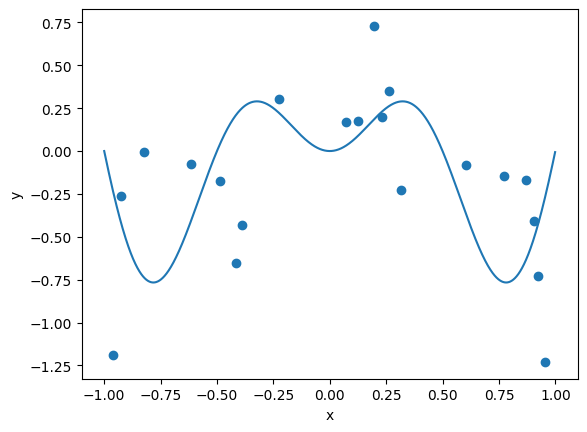

In [375]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(xx, yy)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Восстановление функциональной зависимости с помощью полиномаильной регрессии

Реализуйте с помощью полиномиальной регрессии для полученной выборки восстановление функциональной зависимости, по которой получена выборка. Приведите примеры выборок и степеней полинома, при которых:

- происходит недообучение
- происходит переобучение
- полученная функциональная зависимость пригодна для прогнозирования значения восстанавливаемой функциональной зависимости в $x$, не содержащемся в выборке  

## Решение

Определяем степень полинома, а также матрицу A и вектор b для решения уравнения Ac=b (ищем вектор коэффициентов полинома)

In [376]:
M = 15
A = np.zeros(shape=(M,M))
b = np.zeros(shape = (M))

Определяем функции для заполнения A и b

In [377]:
def a_element(i, j):
    sum = 0
    for k in range(N):
        sum += x[k] ** (i + j)
    return sum

In [378]:
def b_element(i):
    sum = 0
    for k in range(N):
        sum += y[k] * (x[k] ** i)
    return sum

Заполняем A и b

In [379]:
for i in range(M):
  for j in range(M):
    A[i][j] = a_element(i,j)

for i in range(M):
  b[i]=b_element(i)

Решаем уравнение и получаем вектор коэффициентов

In [380]:
import scipy
from scipy.linalg import solve

c = solve(A,b)

Зная коэффициенты полинома, реализуем функцию определения значения полинома в точке

In [381]:
def calc_poly(x):
    sum = 0
    for i in range(M):
        sum += c[i] * x ** i
    return sum

Отобразим полученные значения зависимостей на графиках

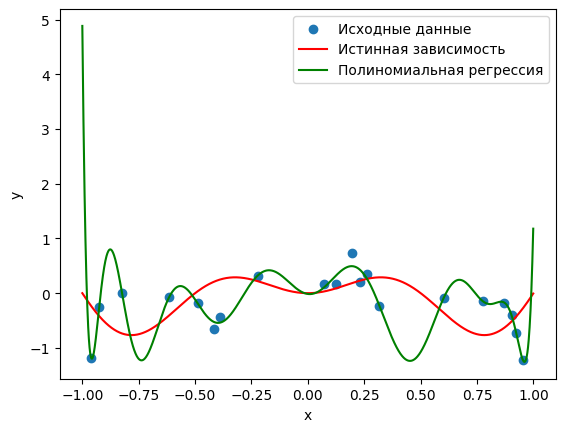

In [382]:
plt.scatter(x, y, label='Исходные данные')
plt.plot(xx, yy, color='red', label='Истинная зависимость')
plt.plot(xx, calc_poly(xx), color='green', label='Полиномиальная регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()